In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
hbo = pd.read_pickle("hbo_genres.pkl")

In [3]:
hbo.dtypes

show                object
year                 int64
rating              object
imdb               float64
rotten_tomatoes     object
tconst              object
titleType           object
primaryTitle        object
originalTitle       object
isAdult            float64
startYear          float64
endYear            float64
runtimeMinutes      object
genres              object
Action               int32
Adventure            int32
Drama                int32
Crime                int32
Thriller             int32
History              int32
Mystery              int32
Sci-Fi               int32
Comedy               int32
News                 int32
Talk-Show            int32
Fantasy              int32
Music                int32
Musical              int32
Documentary          int32
Family               int32
War                  int32
Sport                int32
Biography            int32
Romance              int32
Animation            int32
Horror               int32
Reality-TV           int32
G

In [6]:
hbo["rating"].value_counts()

18+    116
16+     22
all      9
7+       8
Name: rating, dtype: int64

In [8]:
hbo["rating"] = [str(i).replace("+", "") for i in hbo["rating"]]

In [9]:
hbo["rating"] = np.where(hbo["rating"] == "all", 0, hbo["rating"])

In [10]:
hbo["rating"] = pd.to_numeric(hbo["rating"], errors="coerce")
hbo["runtimeMinutes"] = pd.to_numeric(hbo["runtimeMinutes"], errors="coerce")

In [11]:
hbo["rating"].describe()

count    155.000000
mean      16.103226
std        4.708619
min        0.000000
25%       17.000000
50%       18.000000
75%       18.000000
max       18.000000
Name: rating, dtype: float64

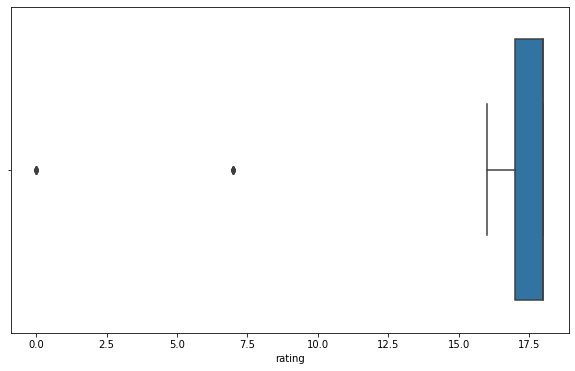

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(hbo["rating"])

In [14]:
hbo["runtimeMinutes"].describe()

count    161.000000
mean      83.614907
std      111.013122
min       11.000000
25%       30.000000
50%       52.000000
75%       60.000000
max      594.000000
Name: runtimeMinutes, dtype: float64

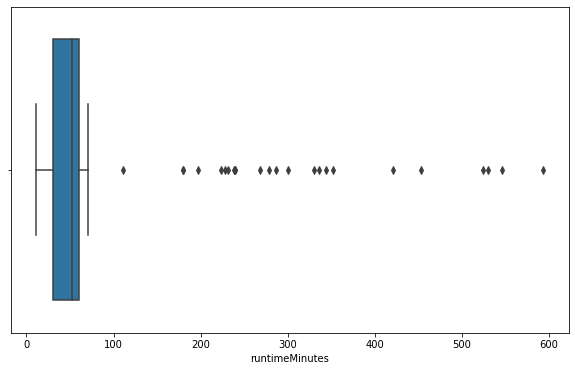

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(hbo["runtimeMinutes"])

(0, 100)

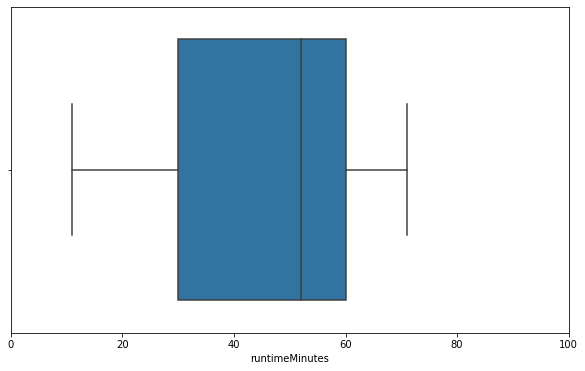

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(hbo["runtimeMinutes"])
ax.set_xlim(0, 100)

In [17]:
hbo["startYear"].describe()

count     186.000000
mean     2010.860215
std         9.156408
min      1969.000000
25%      2007.250000
50%      2014.000000
75%      2018.000000
max      2020.000000
Name: startYear, dtype: float64

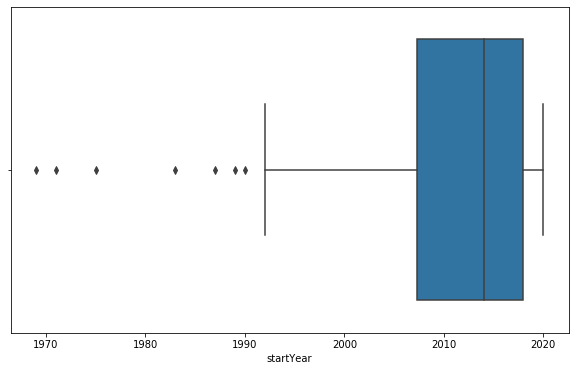

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(hbo["startYear"])

(1990, 2020)

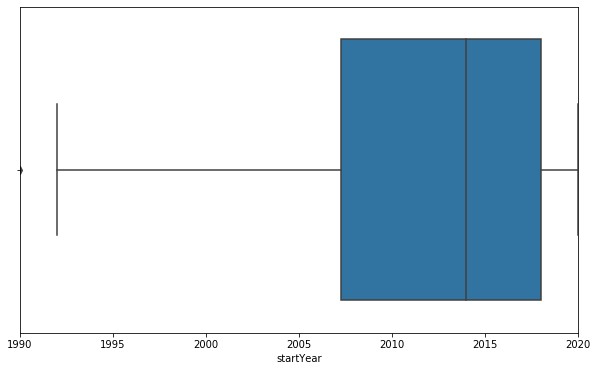

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(hbo["startYear"])
ax.set_xlim(1990, 2020)

In [20]:
ratings = pd.read_csv("C:/Users/Admin/Documents/ironhack/title.ratings.tsv.gz", sep="\t")

In [21]:
hbo = hbo.merge(ratings, how="left", on="tconst")

In [22]:
hbo = hbo.drop(columns="numVotes")

In [23]:
hbo["averageRating"].describe()

count    186.000000
mean       7.529570
std        0.995741
min        3.800000
25%        7.100000
50%        7.600000
75%        8.300000
max        9.400000
Name: averageRating, dtype: float64

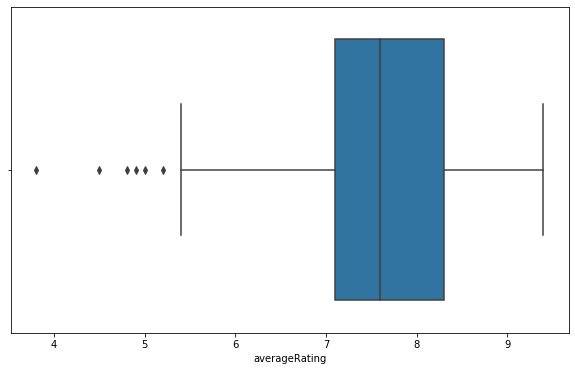

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(hbo["averageRating"])

In [25]:
hbo[hbo["averageRating"] < 5].sort_values("averageRating")

,show,year,rating,imdb,rotten_tomatoes,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Action,Adventure,Drama,Crime,Thriller,History,Mystery,Sci-Fi,Comedy,News,Talk-Show,Fantasy,Music,Musical,Documentary,Family,War,Sport,Biography,Romance,Animation,Horror,Reality-TV,Game-Show,averageRating
176,Sweet 15: Quinceañera,2016,NaN,6.4,NaN,tt5117094,tvSeries,Sweet 15: Quinceañera,Sweet 15: Quinceañera,0.0,2015.0,2015.0,NaN,Reality-TV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.8
181,El Negocio,2014,NaN,NaN,NaN,tt2272362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.5
131,Camping,2018,18.0,4.8,27%,tt8002604,tvSeries,Camping,Camping,0.0,2018.0,2018.0,30.0,Comedy,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.8
121,Betty,2020,NaN,4.7,92%,tt10814438,tvSeries,Betty,Betty,0.0,2020.0,2020.0,NaN,Comedy,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.9


In [28]:
(hbo[hbo["averageRating"] < 5].sort_values("averageRating")).shape[0] / hbo.shape[0]

0.021164021164021163